[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amingolnari/KMeans-py/blob/main/MyKMeans.ipynb)

In [1]:
import numpy as np # For mathematical operations and data generating
from matplotlib import pyplot as plt # To plot data and results
from sklearn.cluster import KMeans # To evaluating our implemented KMeans

In [2]:
def random_data_sample(num_classes = 20, num_samples = 100, centers_range = (-10, 10)):
    """
    num_classes: number of desired classes in data
    num_samples: number of samples in each class
    centers_range: range of centers of each class
    num_features: number of features in data
    """
    if centers_range[0] > centers_range[1]:
        centers_range[0], centers_range[1] = centers_range[1], centers_range[0]
    num_features = 3 # three dim or three features 
    # Generating random centers
    centers = np.random.randint(centers_range[0], centers_range[1], (num_classes, num_features))
    # Generating random data acording to centers
    data = [np.random.randn(num_samples, num_features)] * num_classes 
    
    return np.concatenate(data + np.reshape(centers, (num_classes, 1, num_features)))

In [3]:
def random_centers(data, num_clusters, num_features):
    """
    data: training data
    num_clusters: number of clusters
    num_features: the number of features in data (each row consists of three number or features)
    """
    # Generating random centers
    return np.random.randn(num_clusters, num_features) * np.std(data, axis = 0) + np.mean(data, axis = 0)

In [4]:
def plot_clusters(data, centers, labels):
    # Generating random RGBa color
    color = np.random.uniform(0, 1, (len(centers), 4))
    # Setting alpha into 0.6
    color[:, 3] = .6
    fig = plt.figure(figsize = (9, 8))
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker = '*', s = 10, color = color[labels], label = 'Random Sample')
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker = 'o', s = 90, color = '#FF3200', label = 'Center')
    ax.view_init(elev = 20., azim = -45.)
    ax.set_title(f'KMeans Clustering - No. of Clusters: {len(centers)}')
    plt.legend()
    plt.show()

In [5]:
def MyKMeans(data, num_clusters, min_error = 1e-10, max_iter = 100):
    """
    data: training data
    num_clusters: number of clusters
    num_data: the number of training data 
    num_features: the number of features in data (each row consists of N number or features)
    centers: generating random center for training data (output)
    labels: labeling whole training data (output)
    max_iter: stop-training condition
    min_error: stop-training condition
    """
    num_data, num_features = data.shape
    centers = random_centers(data, num_clusters, num_features)
    labels = np.zeros(num_data)
    iter = 0
    err = 1e+5
    while (iter < max_iter) and (err > min_error):
        # Measuring the distance of each feature to centers
        distances = np.linalg.norm(np.stack([data] * num_clusters, axis = 1) - np.stack([centers] * num_data, axis = 0), axis = 2)
        # Allocating labels to whole training data into the closest center
        labels = np.argmin(distances, axis = 1)
        # Centers correction
        centers_temp = []
        for n in range(num_clusters):
            centers_temp.append(np.mean(data[np.where(np.equal(labels, n))], axis = 0))
        centers_temp = np.stack(centers_temp)
        # Measuring error
        err = np.linalg.norm(centers - centers_temp)
        centers = centers_temp
        iter += 1

    return tuple((centers, labels))

In [6]:
num_classes = 6
num_samples = 200
centers_range = (-4, 6)
data = random_data_sample(num_classes = num_classes, num_samples = num_samples, centers_range = centers_range)

In [7]:
num_clusters = 4
max_iter = 100
min_error = 1e-5
centers, labels = MyKMeans(data = data, num_clusters = num_clusters, min_error = min_error, max_iter = max_iter)

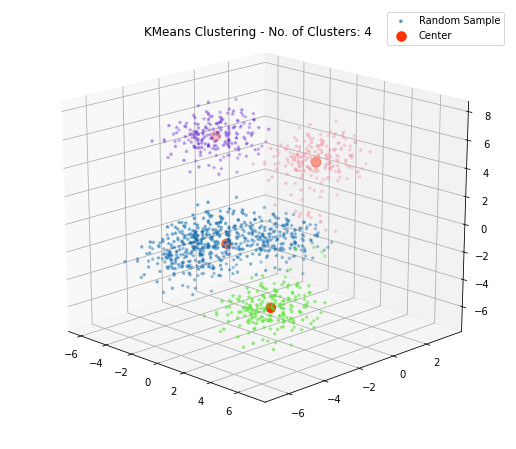

In [8]:
plot_clusters(data, centers, labels)

In [9]:
k_means_cluster = KMeans(n_clusters = num_clusters, max_iter = max_iter).fit(data)

In [10]:
centers, labels = k_means_cluster.cluster_centers_, k_means_cluster.labels_

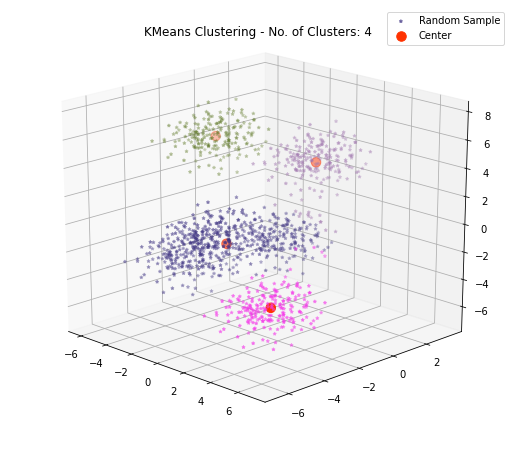

In [11]:
plot_clusters(data, centers, labels)